## Plotting in Python - HW 2

This second project will introduce you to working with and plotting/respresenting data.
(Written by Peter Frinchaboy, Mia Bovill, and John Donor)

In [106]:
# Import the needed fuctions
from matplotlib import pyplot as plt
import numpy as np

You will first need to download the plain text data file "hlist_1.00000.list", that we will read in to have data to plot.

In [107]:
# This will read in the data into a numpy array
data = np.genfromtxt("hlist_1.00000.list")
# This will seperate specific columns of the data into newly created variables
mvir = data[:,10]   # mass
rvir = data[:,11]   # radius
Nproj = data[:,4] 
vmax = data[:,16]   # max velocity
vpeak = data[:,37]  # peak velocity

In [108]:
# Personal Notes
a = np.arange(1,4)
b = np.arange(4,7)
c = np.arange(7,10)
x = np.array([a,b,c])

print('x array is: \n', x)

print('\n-------------------\n')

for i in range(len(x[0])):
    print('Typing in: \'x[:,%i]\' prints' %i, x[:,i], '\n') 
    
print('\n-------------------\n')

for i in range(len(x[0])):
    print('Typing in: \'x[%i,:]\' prints' %i, x[i,:], '\n') 

x array is: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

-------------------

Typing in: 'x[:,0]' prints [1 4 7] 

Typing in: 'x[:,1]' prints [2 5 8] 

Typing in: 'x[:,2]' prints [3 6 9] 


-------------------

Typing in: 'x[0,:]' prints [1 2 3] 

Typing in: 'x[1,:]' prints [4 5 6] 

Typing in: 'x[2,:]' prints [7 8 9] 



In [109]:
data[2,11]

77.73

Next we will gerenerate a first plot of mass vs velocity. 

This will introduce the first options you will have.

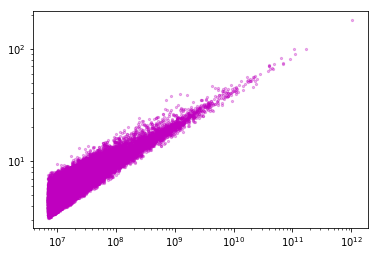

In [110]:
# Creating a scatter plot in log log space using an object oriented approach
fig = plt.figure()                           # makes a figure
ax = fig.add_subplot(111)                    # make a 1,1,1 (single) figure
ax.scatter(mvir,vmax,s=5,c='m',alpha=0.3)    # makes a scatter plot (s = size, c = color, alpha = transparency)
ax.set_xscale('log')                         # sets the x axis to a log scale
ax.set_yscale('log')                         # sets the y axis to a log scale


# personal notes
# figure is the box while scatter is a way to represent data
# [if not scatter, then histogram or plot(which connects the dots)..]
# (s) is the size of the data points, while figsize is the size of the box.
# ax is a figure
# plt comes from matplotlib, fig is a shortcut for plotting a figure from matplotlib

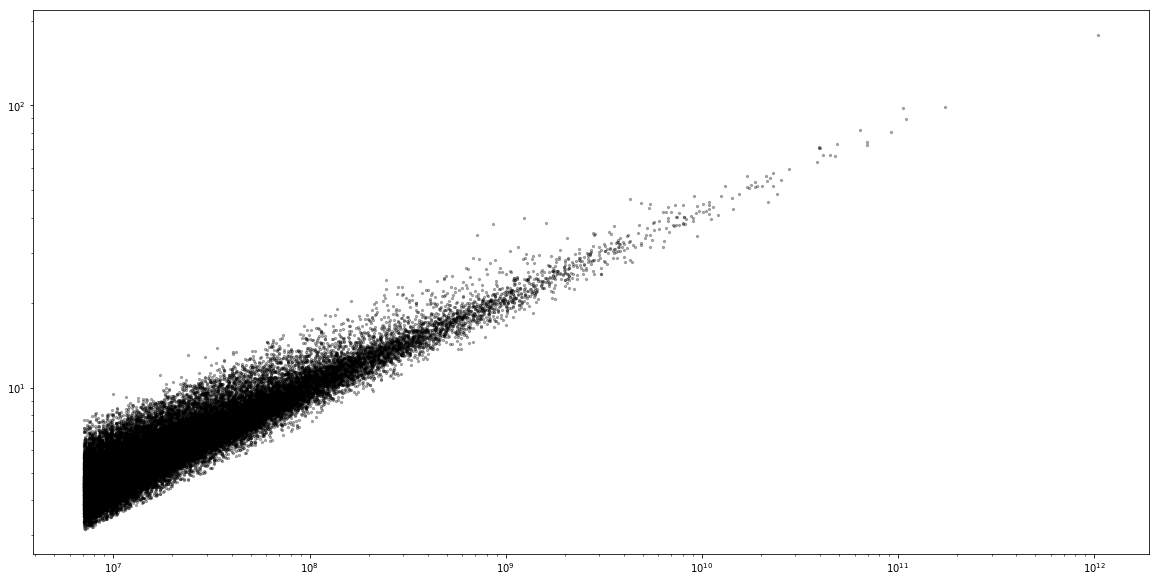

In [111]:
# Changing the size of the plot -- figsize
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
ax.scatter(mvir,vmax,s=5,c='k',alpha=0.3)
ax.set_xscale('log')
ax.set_yscale('log')

Well this looks like a nice plot, but if you gave this to someone could they tell what it was a plot of?

We need add labels to inform the reader, also we will limit the plot to only show a portion of the data.

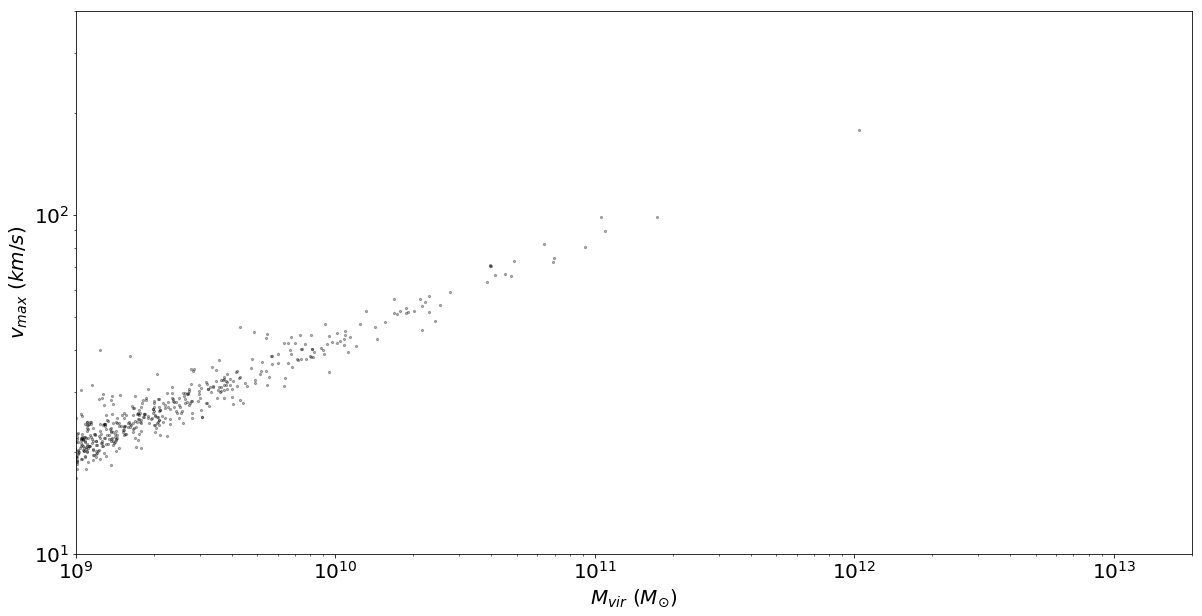

In [112]:
# this is the same as above
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.scatter(mvir,vmax,s=5,c='k',alpha=0.3)
ax.set_xscale('log')
ax.set_yscale('log')

# Now, we will label the axis and set the limits of the axis and increase ticksize of the axis
# Set the start and end of range you want to display on the x and yaxis 
ax.set_xlim(10**9.0,2.0*10.0**13.0)
ax.set_ylim(10**1.0,400.0)

# add the labels
ax.set_xlabel("$M_{vir}$ $(M_{\odot})$",size=20) # allows LaTeX style formating
ax.set_ylabel("$v_{max}$ $(km/s)$",size=20)      # allows LaTeX style formating

# increase the size of the numbers on the axes
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

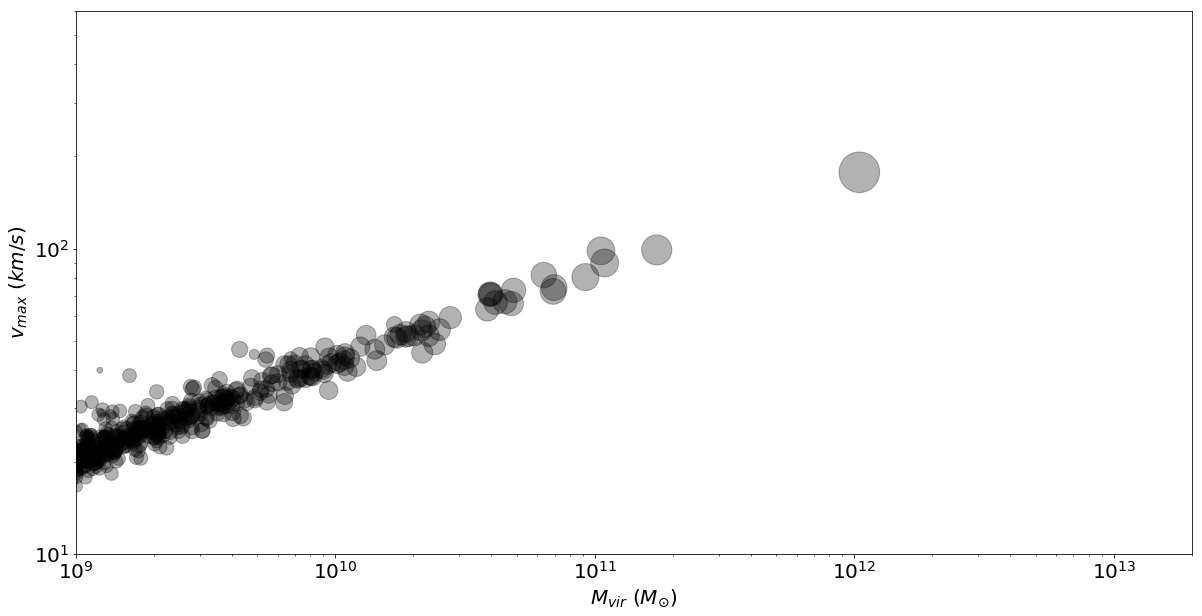

In [113]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# Sizing the points according to a 3rd attribute - rvir
ax.scatter(mvir,vmax,s=10*rvir,c='k',alpha=0.3)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(10**9.0,2.0*10.0**13.0)
ax.set_ylim(10**1.0,600.0)

ax.set_xlabel("$M_{vir}$ $(M_{\odot})$",size=20)
ax.set_ylabel("$v_{max}$ $(km/s)$",size=20)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

# to avoid printing the last line's output, add plt.show() at the end of the cell

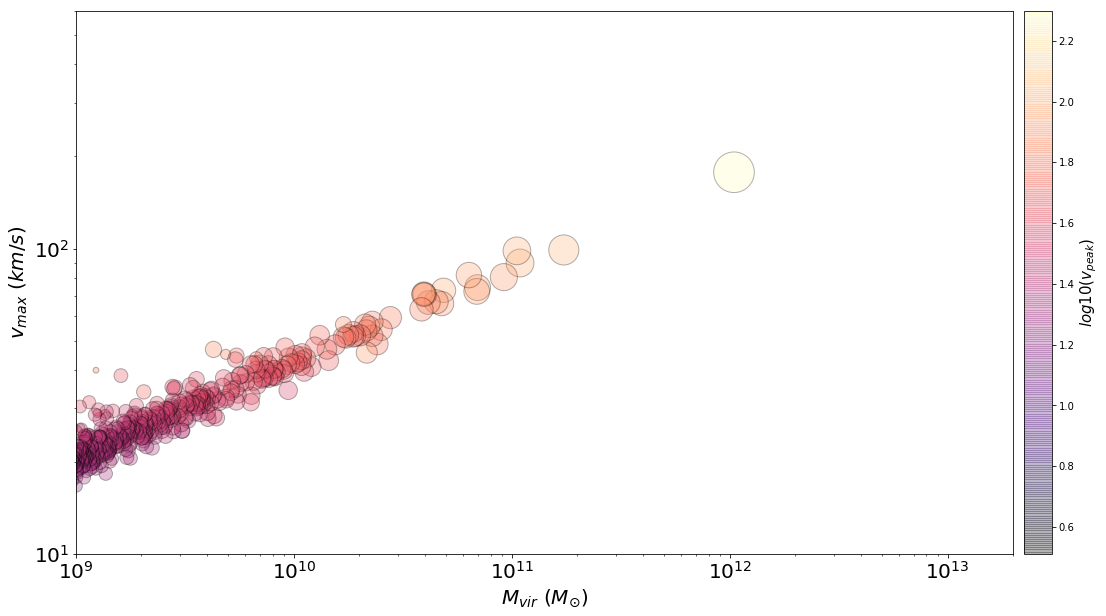

In [114]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# Coloring the points by a 4th attribute and adding a color bar
image = ax.scatter(mvir,vmax,s=10*rvir,c=np.log10(vpeak), cmap= 'magma',edgecolor='k',alpha=0.3)
bar = fig.colorbar(image,orientation="vertical",pad=0.01)
bar.set_label('$log10(v_{peak})$',size=15)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(10**9.0,2.0*10.0**13.0)
ax.set_ylim(10**1.0,600.0)

ax.set_xlabel("$M_{vir}$ $(M_{\odot})$",size=20)
ax.set_ylabel("$v_{max}$ $(km/s)$",size=20)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

**Personal notes:**

If we have very similar values in some dataset, the colors of the points will be the same. the np.log10(colomn)
will help distinguish the colors by taking the logs of the values, hence, different values

**bar** = image is my scatter given more parameters relevant to color bar. pad is the distance between the bar and the plot.


edge color colors the edge of the data points.

cmap is the color map which colors all of the data points.
If left out, the default color would be yellow and green.
options are: cool=pink/blue, gray, and https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

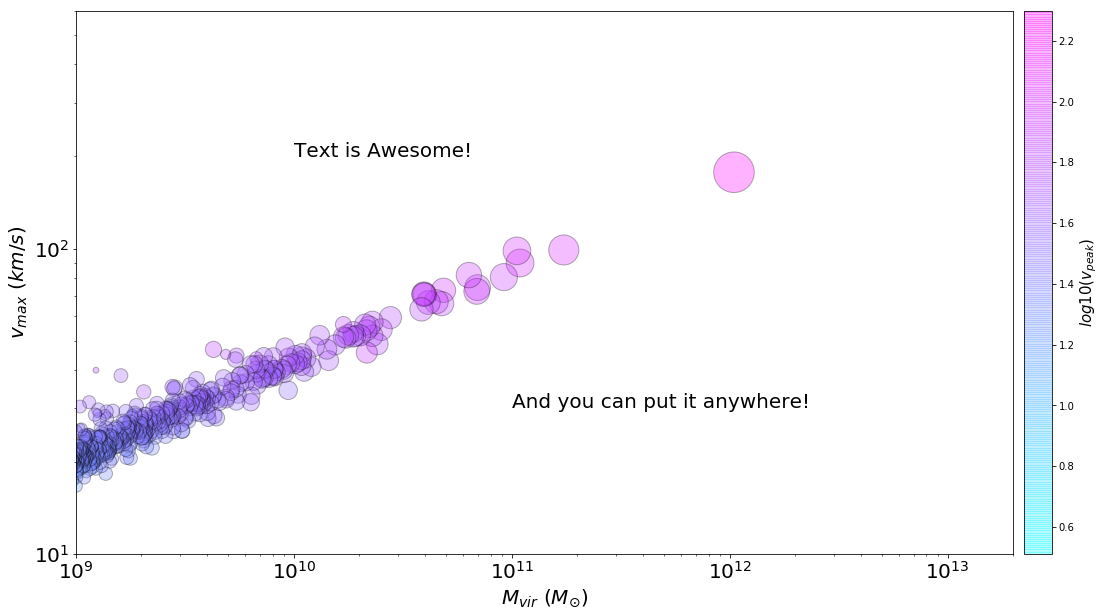

In [115]:
# Inserted text into the plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

image = ax.scatter(mvir,vmax,s=10*rvir,c=np.log10(vpeak),edgecolor='k',cmap="cool",alpha=0.3)
bar = fig.colorbar(image,orientation="vertical",pad=0.01)
bar.set_label('$log10(v_{peak})$',size=15)

ax.text(10**10, 200, "Text is Awesome!",size=20) #ax.text(x-pos, y-pos, 'Text')
ax.text(10**11, 30, "And you can put it anywhere!",size=20)


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(10**9.0,2.0*10.0**13.0)
ax.set_ylim(10**1.0,600.0)

ax.set_xlabel("$M_{vir}$ $(M_{\odot})$",size=20)
ax.set_ylabel("$v_{max}$ $(km/s)$",size=20)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

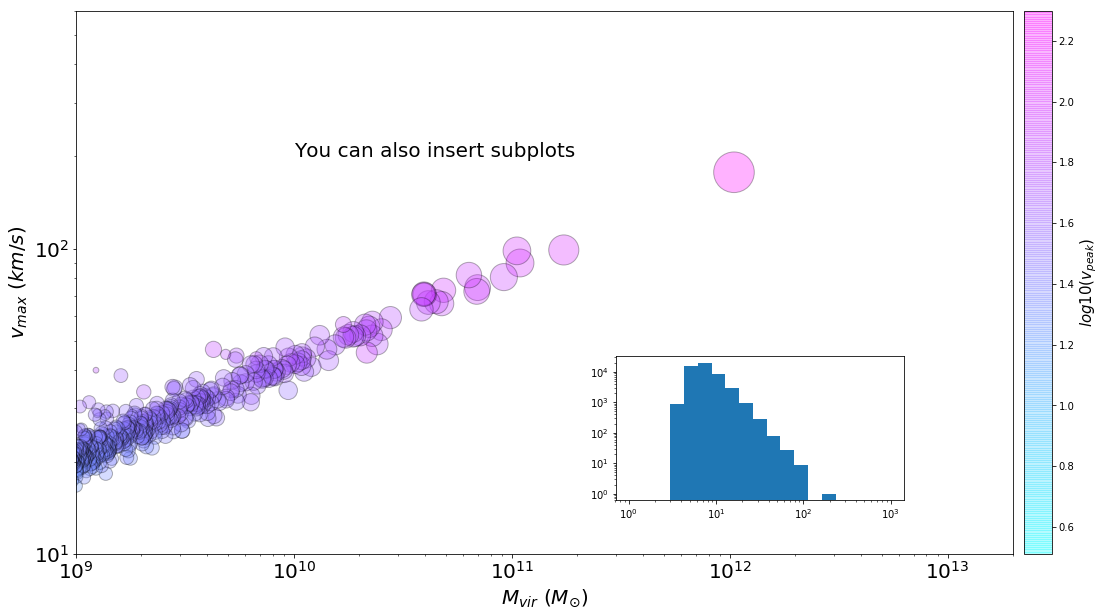

In [142]:
# Inserted text into the plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

image = ax.scatter(mvir,vmax,s=10*rvir,c=np.log10(vpeak),edgecolor='k',cmap="cool",alpha=0.3)
bar = fig.colorbar(image,orientation="vertical",pad=0.01)
bar.set_label('$log10(v_{peak})$',size=15)

ax.text(10**10, 200, "You can also insert subplots",size=20)

# Inserting a subplot
ax_sub = fig.add_axes([0.5,0.2,0.2,0.2])
ax_sub.hist(vpeak,bins=np.logspace(0,3,20),log='True')
ax_sub.set_xscale('log')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(10**9.0,2.0*10.0**13.0)
ax.set_ylim(10**1.0,600.0)

ax.set_xlabel("$M_{vir}$ $(M_{\odot})$",size=20)
ax.set_ylabel("$v_{max}$ $(km/s)$",size=20)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

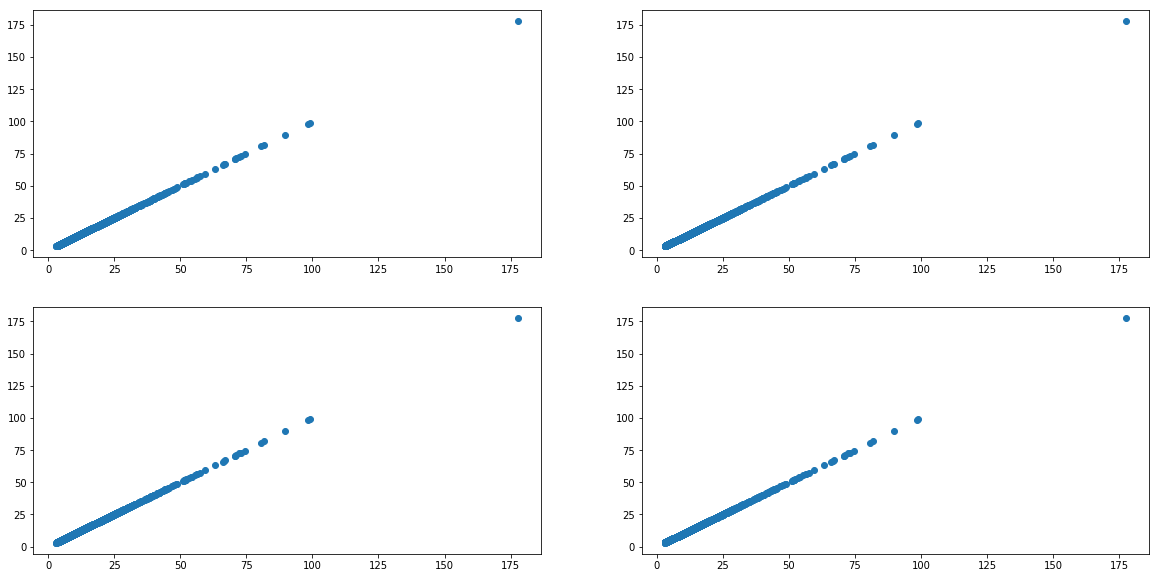

In [117]:
# Adding multiple plots
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(221)
ax1.scatter(vmax,vmax)

ax2 = fig.add_subplot(222)
ax2.scatter(vmax,vmax)

ax3 = fig.add_subplot(223)
ax3.scatter(vmax,vmax)

ax4 = fig.add_subplot(224)
ax4.scatter(vmax,vmax)

[]

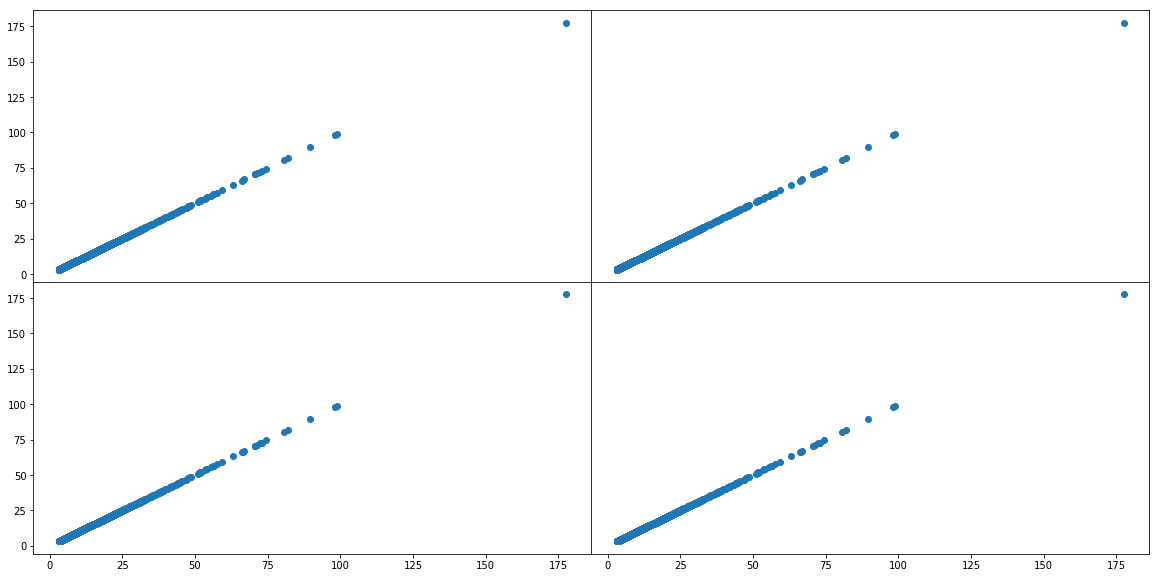

In [118]:
fig = plt.figure(figsize=(20,10))

# Condensing the plots
fig.subplots_adjust(hspace=0.0, wspace=0.0)

ax1 = fig.add_subplot(221)
ax1.scatter(vmax,vmax)

ax2 = fig.add_subplot(222)
ax2.scatter(vmax,vmax)

ax3 = fig.add_subplot(223)
ax3.scatter(vmax,vmax)

ax4 = fig.add_subplot(224)
ax4.scatter(vmax,vmax)

# Removing unneeded tick axis
ax1.set_xticks([])
ax2.set_yticks([])
ax2.set_xticks([])
ax4.set_yticks([])

# Exercise - Plot on the same figure mvir and mpeak versus vmax and vpeak. 
Give the sizes of the points by rvir and color the points by Nproj. Make sure to label your axis and include a colorbar.
#Extra awesome for adding an inserted histgram of mvir into one of its plots.

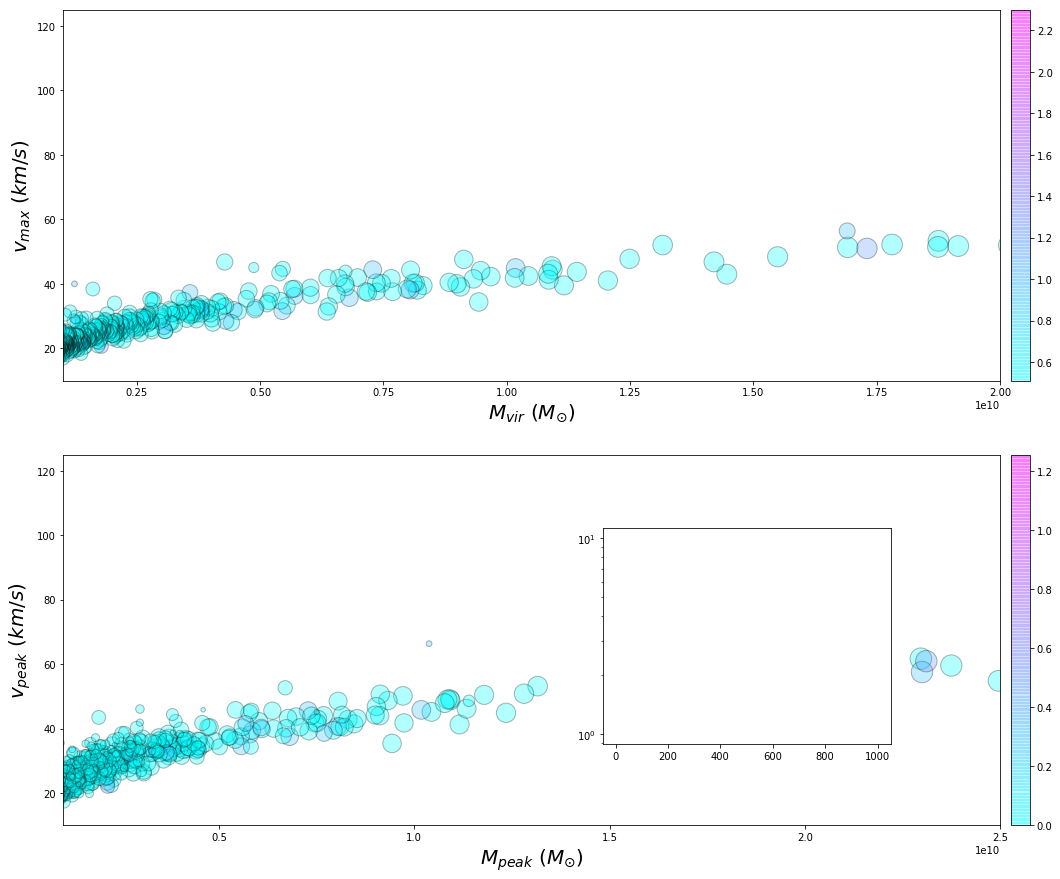

In [145]:
# '''
# - Plot on the same figure mvir and mpeak versus vmax and vpeak.
# - Give the sizes of the points by rvir 
# - Color the points by Nproj
# - Make sure to label your axis and include a colorbar.

# #Extra awesome for adding an inserted histgram of mvir into one of its plots.
# '''
mvir = data[:,10]   # mass
rvir = data[:,11]   # radius
Nproj = data[:,4] 
vmax = data[:,16]   # max velocity
vpeak = data[:,37]
mpeak = data[:,35] #Found by looking at the data file used in this notebook

#mvir = Halo mass (Msun/h)
#mpeak = Peak mass over mass accretion history
#vmax = Maxmimum circular velocity (km/s physical).
#vpeak = Vmax over mass accretion history.

fig = plt.figure(figsize=(20,15))

# plot 1
ax1 = fig.add_subplot(211)
image1 = ax1.scatter(mvir,vmax,s=10*rvir,c=np.log10(Nproj),edgecolor='k',cmap="cool",alpha=0.3)
# adding a color bar
bar1 = fig.colorbar(image,orientation="vertical",pad=0.01)
# adding limits for the axis
ax1.set_xlim(10**9.0,2.0*10.0**10.0)
ax1.set_ylim(10,125.0)
# labeling the x and y axis (units)
ax1.set_xlabel("$M_{vir}$ $(M_{\odot})$",size=20)
ax1.set_ylabel("$v_{max}$ $(km/s)$",size=20)

# plot 2
ax2 = fig.add_subplot(212)
image2 = ax2.scatter(mpeak,vpeak,s=10*rvir,c=np.log10(Nproj),edgecolor='k',cmap="cool",alpha=0.3)
# adding a color bar
bar2 = fig.colorbar(image2,orientation="vertical",pad=0.01)
# adding limits for the axis
ax2.set_xlim(10**9.0,2.5*10.0**10.0)
ax2.set_ylim(10,125.0)
# labeling the x and y axis (units)
ax2.set_xlabel("$M_{peak}$ $(M_{\odot})$",size=20)
ax2.set_ylabel("$v_{peak}$ $(km/s)$",size=20)


# Inserting a subplot
ax_sub = fig.add_axes([0.5,0.2,0.2,0.2])
ax_sub.hist(mvir,bins=np.logspace(0,3,20),log='True')
ax_sub.set_xscale('log')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(10**9.0,2.0*10.0**10.0)
ax.set_ylim(10,125.0)

ax.set_xlabel("$M_{vir}$ $(M_{\odot})$",size=20)
ax.set_ylabel("$v_{max}$ $(km/s)$",size=20)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


plt.show()